In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

/Users/alextabora/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
documents_df = pd.read_csv("../files/documents.csv")

In [3]:
for index, row in documents_df[documents_df["category"] == "Criminal"].iterrows():
    print str(index) + "  "+row["title"] 

3  Citan a 11 personas por vender pólvora
5  DEI pide denunciar empleados que hicieron cobro ilegal en aduanas
9  Alcaldía intensifica operativos tras pólvora trasegada a la capital
11  Pasajeros asaltantes acribillan a un taxista
12  Fallece comerciante olanchano víctima de atentado criminal
13  Por venganza mataron a pareja en El Negrito
16  Campesinos hieren a guardia al invadir finca de palma africana
20  Cae banda de asaltantes tras robo en Valle de Ángeles
24  Asesinan a ex presidente de la Andep en su casa
30  Andaba en malos pasos
31  Policía cae junto a banda tras haber asaltado un banco
32  Falsos policías matan a una mujer y su hijo
33  Valiente pasajero perece al tratar de frustrar asalto
34  Apresan dos personas con una tonelada de cohetes
35  Menor es ultimado supuestamente por invasores de tierras
46  Cae policía por robo de café
54  “Enloquecido” masacra a tres hombres de varios machetazos
55  Hombre le saca un ojo a su esposa de un balazo
56  Madre de niño ultimado por

In [4]:
documents_df = documents_df[(documents_df.content.notnull() ) & (documents_df["category"]!="Criminal-Other")]

# Category Distribution

Other       1449
Criminal     222
Name: category, dtype: int64


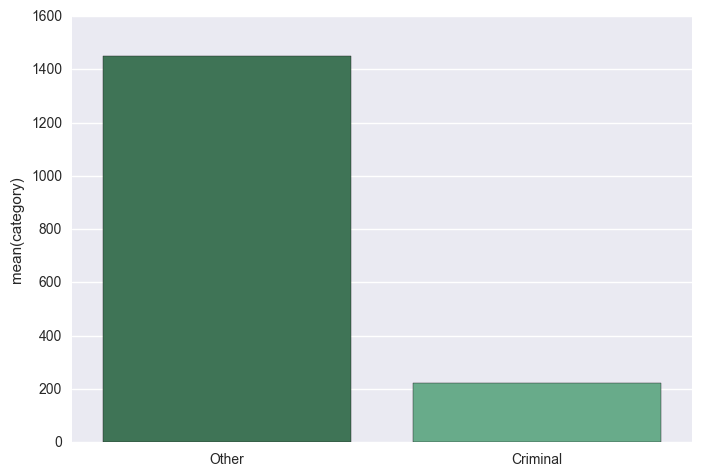

In [5]:
x = documents_df.category.value_counts()
print x

# sns.distplot(x,bins=10)
sns.barplot( x.index,x, palette="BuGn_d", )
plt.show()

# Content Length by Category

In [6]:
documents_df.loc[:,"content_size"] = documents_df.content.apply(lambda x: len(x))
documents_df.groupby(by="category").content_size.mean()

category
Criminal    1862.400901
Other       2066.809524
Name: content_size, dtype: float64

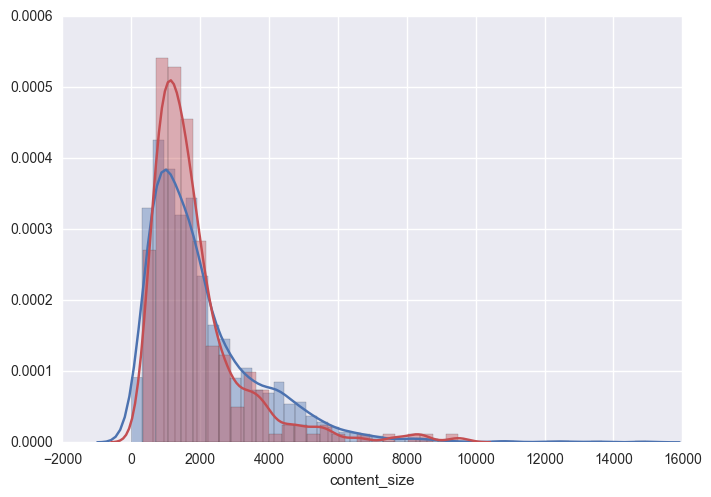

In [7]:
sns.distplot( documents_df[documents_df["category"]=="Other"].content_size, color = 'b'  )
sns.distplot( documents_df[documents_df["category"]=="Criminal"].content_size , color='r' )
plt.show()

# Title Size by Category

In [8]:
documents_df.loc[:,"title_size"] = documents_df.title.apply(lambda x: len(x))
documents_df.groupby(by="category").title_size.mean()

category
Criminal    53.576577
Other       51.193237
Name: title_size, dtype: float64

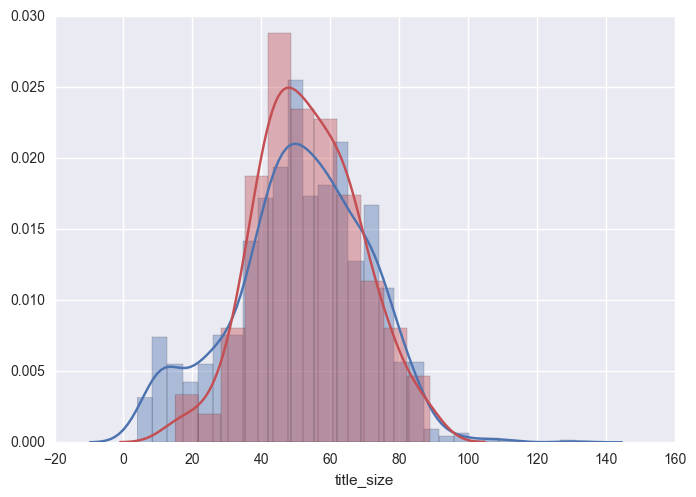

In [9]:
sns.distplot( documents_df[documents_df["category"]=="Other"].title_size, color = 'b'  )
sns.distplot( documents_df[documents_df["category"]=="Criminal"].title_size , color='r' )
plt.show()

# Word Analysis

In [10]:
import nltk
from nltk import wordpunct_tokenize, RegexpTokenizer
stop_words = pd.read_json("../files/stopwords.json")[0].values.tolist()

# Common Content Words

In [14]:
#recompile the whole text for vocabulary
full_text = ""
for index, row in documents_df.iterrows():
    full_text += " " + row["content"]
    
criminal_text = ""
for index, row in documents_df[documents_df["category"] == "Criminal"].iterrows():
    criminal_text += " " + row["content"]   
    
other_text = ""
for index, row in documents_df[documents_df["category"] == "Other"].iterrows():
    other_text += " " + row["content"]   
    
# get the most common words    
regTokenizer = RegexpTokenizer(r'\w+')#RegexpTokenizer(r'\w+')
def most_common(text,top=30):
    tokens = regTokenizer.tokenize( unicode(text, "utf-8").lower() )
    tokens = [ token for token in tokens if token not in stop_words]

    fdist = nltk.FreqDist(tokens)
    for w in  fdist.most_common(top):
        print w

In [15]:
most_common(criminal_text,30)

(u'polic\xeda', 198)
(u'nacional', 175)
(u'autoridades', 156)
(u'colonia', 152)
(u'personas', 138)
(u'san', 111)
(u'a\xf1os', 108)
(u'armas', 108)
(u'honduras', 107)
(u'vida', 106)
(u'seguridad', 105)
(u'zona', 88)
(u'centro', 85)
(u'pedro', 79)
(u'jos\xe9', 78)
(u'sula', 78)
(u'policial', 77)
(u'p\xfablico', 72)
(u'agentes', 71)
(u'crimen', 71)
(u'investigaci\xf3n', 70)
(u'casa', 67)
(u'pa\xeds', 66)
(u'orden', 65)
(u'policiales', 65)
(u'tegucigalpa', 63)
(u'cort\xe9s', 63)
(u'hern\xe1ndez', 63)
(u'drogas', 63)
(u'criminal', 63)


In [16]:
most_common(other_text,30)

(u'honduras', 1106)
(u'nacional', 992)
(u'pa\xeds', 882)
(u'presidente', 705)
(u'gobierno', 689)
(u'a\xf1os', 598)
(u'personas', 545)
(u'millones', 508)
(u'a\xf1o', 488)
(u'vida', 443)
(u'partido', 398)
(u'autoridades', 394)
(u'seguridad', 365)
(u'lempiras', 342)
(u'san', 342)
(u'ley', 324)
(u'semana', 323)
(u'equipo', 315)
(u'zona', 311)
(u'tegucigalpa', 310)
(u'forma', 306)
(u'hern\xe1ndez', 297)
(u'juan', 286)
(u'ciento', 279)
(u'hondure\xf1o', 274)
(u'centro', 274)
(u'caso', 273)
(u'efe', 273)
(u'mil', 272)
(u'derechos', 271)


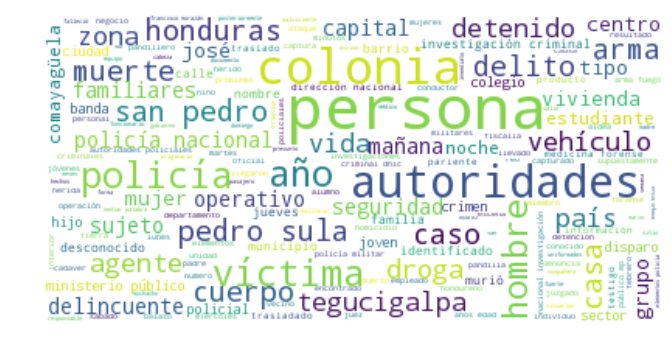

In [17]:
from wordcloud import WordCloud
regTokenizer = RegexpTokenizer(r'\w+')
tokens = regTokenizer.tokenize( unicode(criminal_text, "utf-8").lower() )
tokens = [ token for token in tokens if token not in stop_words]
text = " ".join(tokens)
wordcloud = WordCloud(background_color="white",
                      max_font_size=40, relative_scaling=.9).generate(text )

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

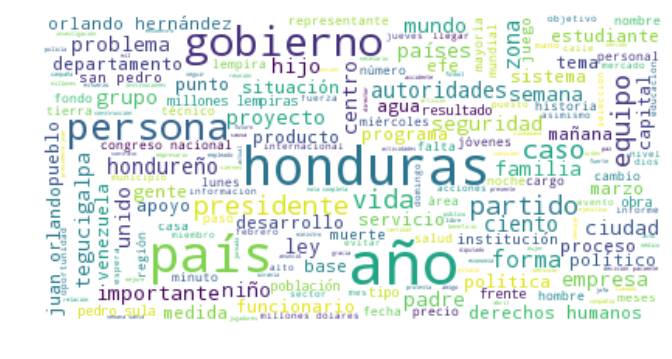

In [18]:
from wordcloud import WordCloud
regTokenizer = RegexpTokenizer(r'\w+')
tokens = regTokenizer.tokenize( unicode(other_text, "utf-8").lower() )
tokens = [ token for token in tokens if token not in stop_words]
text = " ".join(tokens)
wordcloud = WordCloud(background_color="white",
                      max_font_size=40, relative_scaling=.9).generate(text )

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TITLE

In [19]:
#recompile the whole text for vocabulary
criminal_titles = ""
for index, row in documents_df[documents_df["category"] == "Criminal"].iterrows():
    criminal_titles += " " + row["title"]   
    
other_titles = ""
for index, row in documents_df[documents_df["category"] == "Other"].iterrows():
    other_titles += " " + row["title"]   

In [20]:
for index, row in documents_df[documents_df["category"] == "Criminal"].iterrows():
    print str(index) + "  "+row["title"] 

3  Citan a 11 personas por vender pólvora
5  DEI pide denunciar empleados que hicieron cobro ilegal en aduanas
9  Alcaldía intensifica operativos tras pólvora trasegada a la capital
11  Pasajeros asaltantes acribillan a un taxista
12  Fallece comerciante olanchano víctima de atentado criminal
13  Por venganza mataron a pareja en El Negrito
16  Campesinos hieren a guardia al invadir finca de palma africana
20  Cae banda de asaltantes tras robo en Valle de Ángeles
24  Asesinan a ex presidente de la Andep en su casa
30  Andaba en malos pasos
31  Policía cae junto a banda tras haber asaltado un banco
32  Falsos policías matan a una mujer y su hijo
33  Valiente pasajero perece al tratar de frustrar asalto
34  Apresan dos personas con una tonelada de cohetes
35  Menor es ultimado supuestamente por invasores de tierras
46  Cae policía por robo de café
54  “Enloquecido” masacra a tres hombres de varios machetazos
55  Hombre le saca un ojo a su esposa de un balazo
56  Madre de niño ultimado por

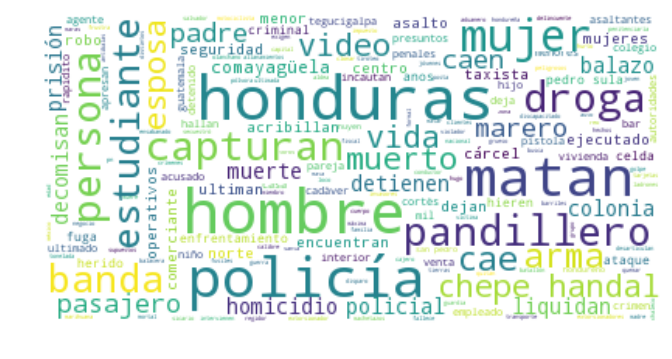

In [21]:
regTokenizer = RegexpTokenizer(r'\w+')
tokens = regTokenizer.tokenize( unicode(criminal_titles, "utf-8").lower() )
tokens = [ token for token in tokens if token not in stop_words]
text = " ".join(tokens)
wordcloud = WordCloud(background_color="white",
                      max_font_size=40, relative_scaling=.9).generate(text )

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

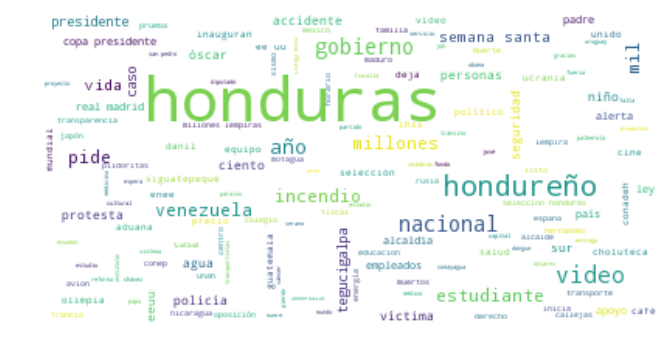

In [24]:
regTokenizer = RegexpTokenizer(r'\w+')
tokens = regTokenizer.tokenize( unicode(other_titles, "utf-8").lower() )
tokens = [ token for token in tokens if token not in stop_words]
text = " ".join(tokens)
wordcloud = WordCloud(background_color="white",
                      max_font_size=40, relative_scaling=.8).generate(text )

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()